Data Dictionary:

survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Import required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import csv file
train = pd.read_csv(r'.\Desktop\train.csv')
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,NaN,C
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S


In [4]:
test = pd.read_csv(r'.\Desktop\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# data size
print(f'There are {train.shape[0]} rows in train data set.')
print(f'There are {train.shape[1]} columns in train data set.')
print(f'There are {test.shape[0]} rows in test data set.')
print(f'There are {test.shape[1]} columns in test data set.')


There are 891 rows in train data set.
There are 12 columns in train data set.
There are 418 rows in test data set.
There are 11 columns in test data set.


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
import missingno as mn

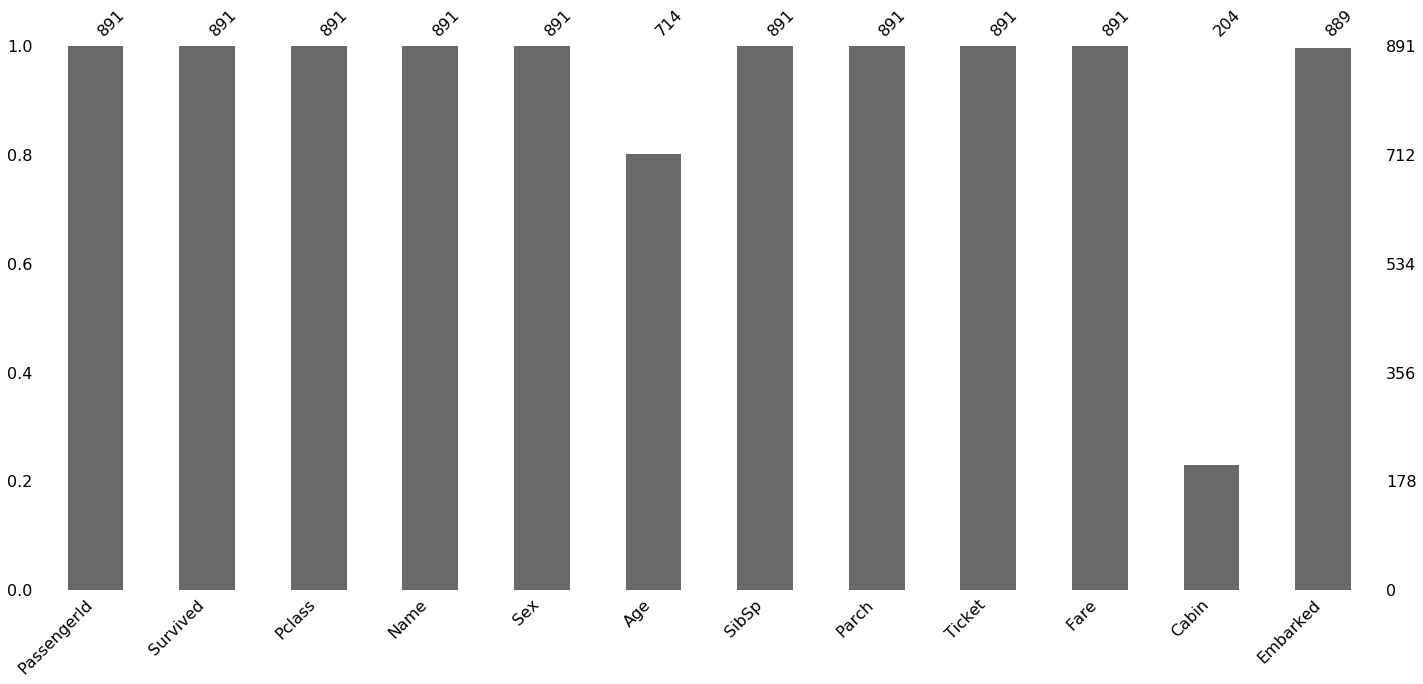

In [10]:
mn.bar(train)

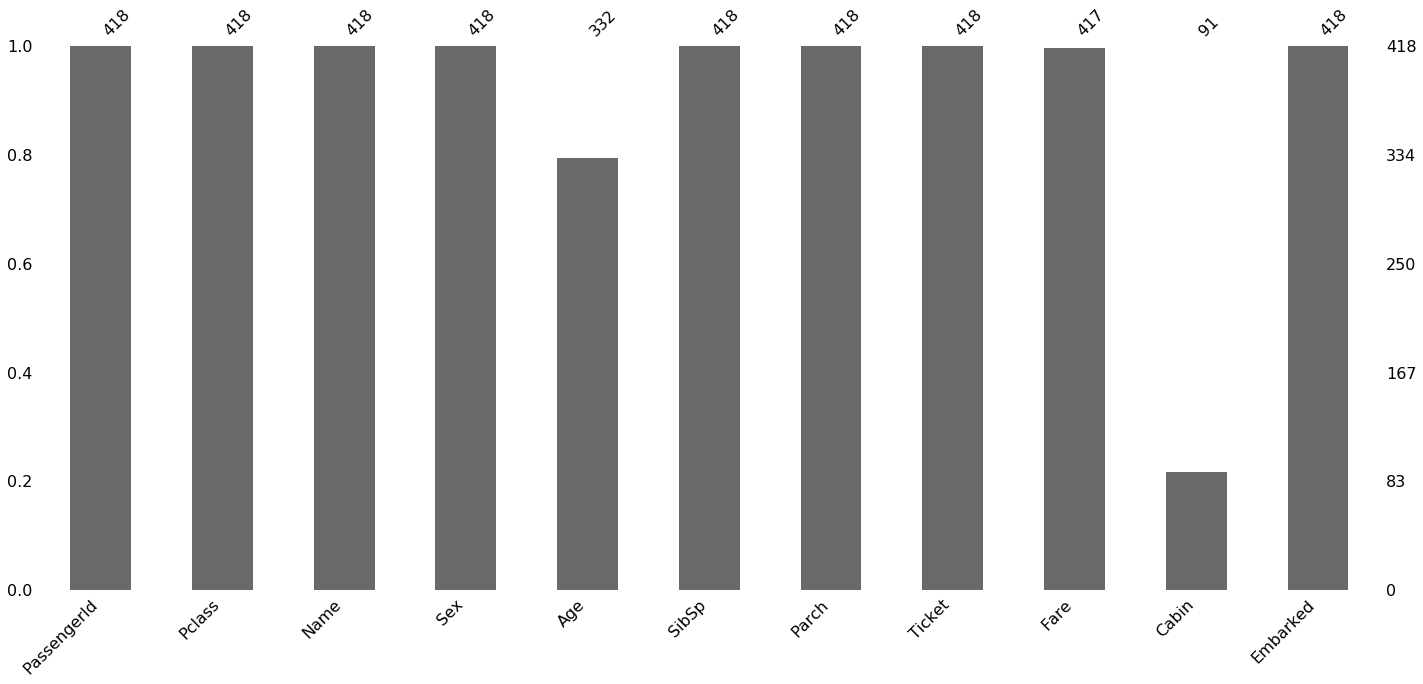

In [11]:
mn.bar(test)

In [12]:
def missing_ratio(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])


In [13]:
missing_ratio(train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [14]:
missing_ratio(test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


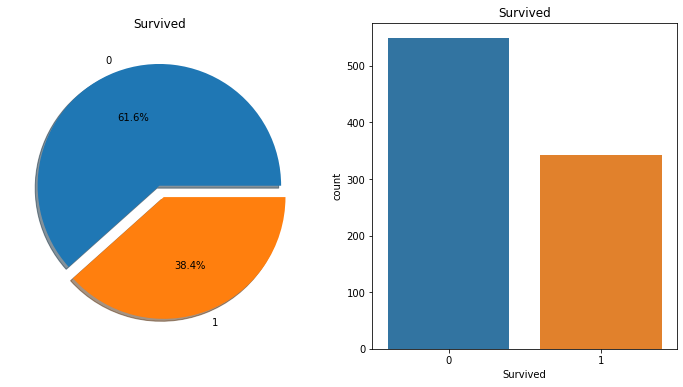

In [73]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
train['Survived'].value_counts().plot.pie(explode = [0,0.1],
                                          autopct = '%1.1f%%',
                                          ax = ax[0],
                                          shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',
              data = train,
              ax = ax[1])
ax[1].set_title('Survived')
plt.show()

In [15]:
all_data = [train,test]
for data in all_data:
    data.drop(['Ticket','Cabin','PassengerId'],  
              axis = 1,
              inplace = True)

In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train.describe(include='O')

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Sloper, Mr. William Thompson",male,S
freq,1,577,644


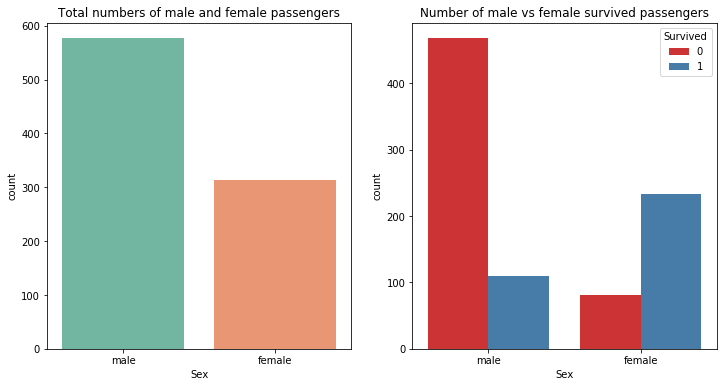

In [72]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex',
              data = train,
              palette = 'Set2',
              ax = ax[0])
ax[0].set_title('Total numbers of male and female passengers')
sns.countplot('Sex',
              data = train,
              hue = 'Survived',
              palette = 'Set1', 
              ax = ax[1])
ax[1].set_title('Number of male vs female survived passengers')
plt.show()

In [36]:
pd.crosstab(train.Sex,train.Survived, margins=True, margins_name='Total')

Survived,0,1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


In [86]:
pd.crosstab(train['Pclass'],train['Survived'],margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


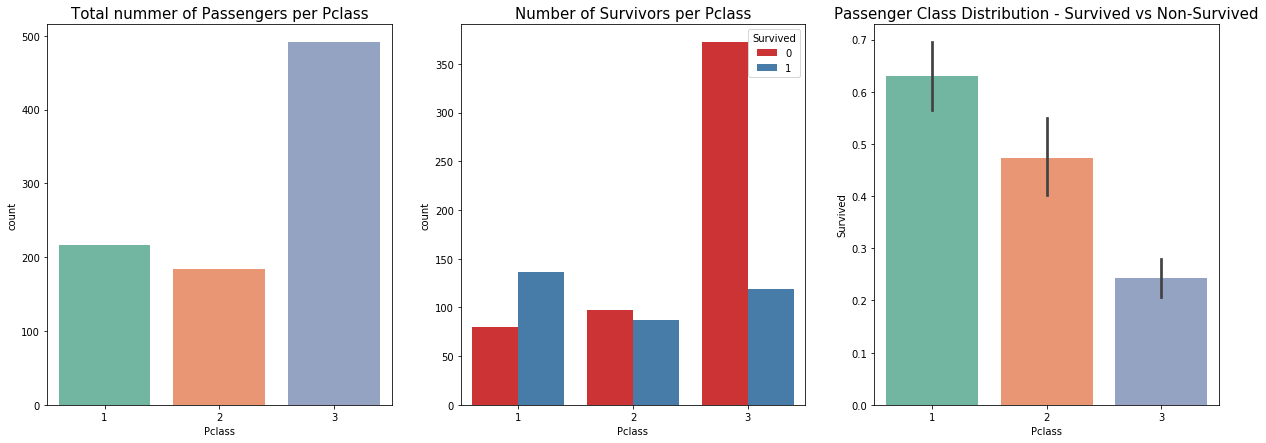

In [67]:
fig,ax=plt.subplots(1,3,figsize=(21,7))
sns.countplot('Pclass', 
              data = train,
              palette = 'Set2', 
              ax = ax[0])
ax[0].set_title('Total nummer of Passengers per Pclass',fontsize = 15)
sns.countplot('Pclass',
              data = train,
              hue = 'Survived',
              palette = 'Set1', 
              ax = ax[1])
ax[1].set_title('Number of Survivors per Pclass',fontsize = 15)
sns.barplot(x = "Pclass", 
            y = "Survived",
            data=train, 
            palette = 'Set2', 
            ax = ax[2])
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
plt.show()

<Figure size 1152x504 with 0 Axes>

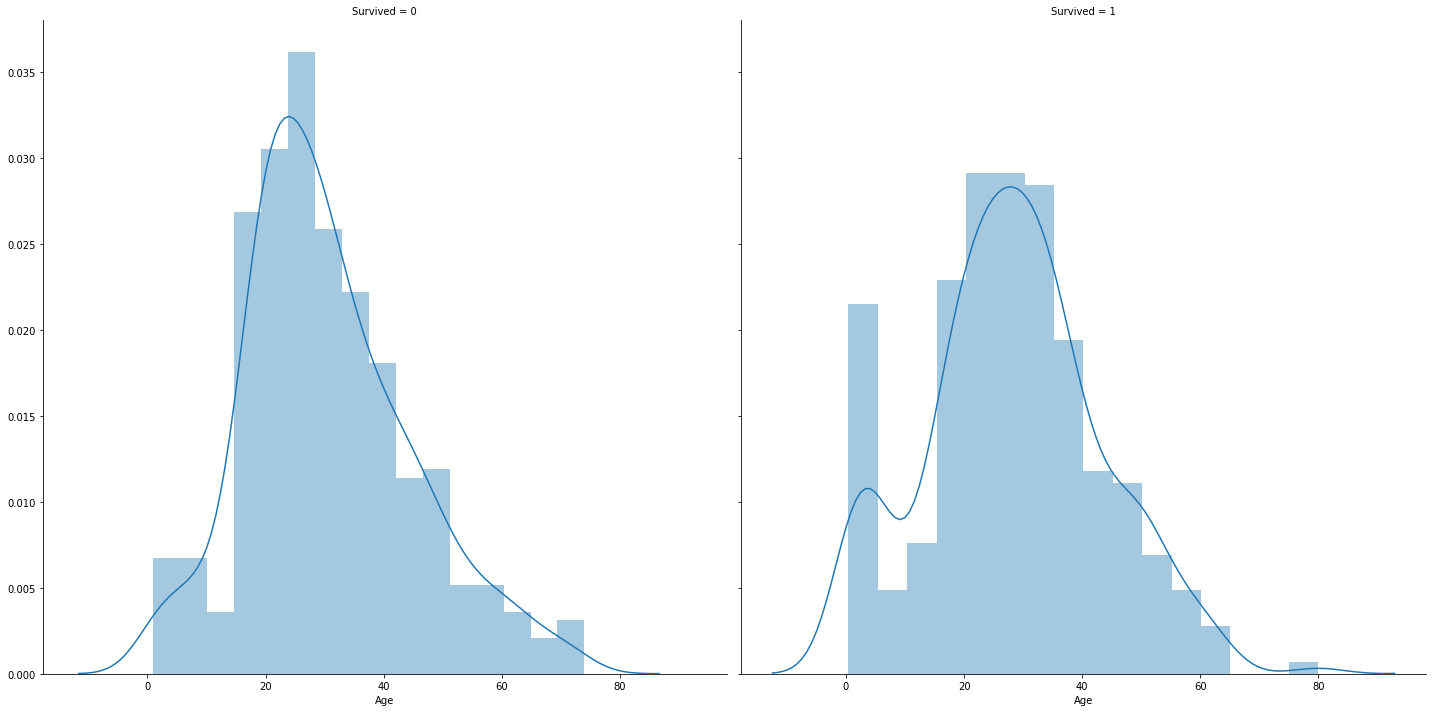

In [122]:
# Explore Age vs Survived
plt.figure(figsize=(16,7))
g = sns.FacetGrid(train, 
                  col = 'Survived',
                  size = 10)
g = g.map(sns.distplot, "Age")
plt.show()

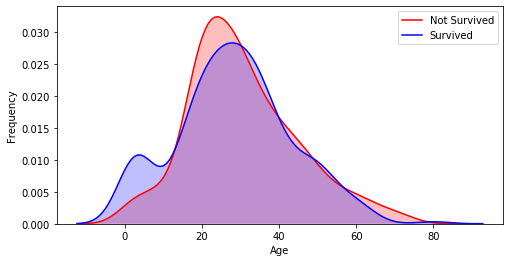

In [82]:
# Explore Age distibution 
plt.figure(figsize=(8,4))
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], 
                color = "Red",
                shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], 
                ax = g,
                color = "Blue",
                shade = True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

C:\Users\THM\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


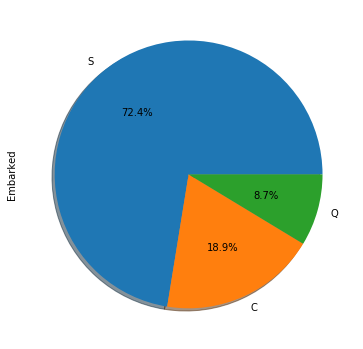

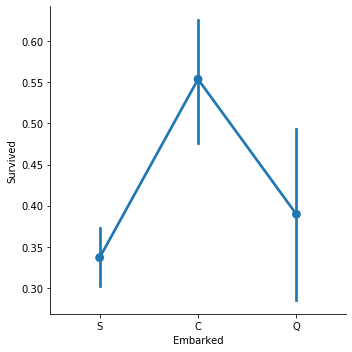

In [114]:
fig,ax = plt.subplots(1,1,figsize=(6,10))
train['Embarked'].value_counts().plot.pie(autopct = '%1.1f%%',
                                          ax=ax,
                                          shadow = True)

sns.factorplot(x = 'Embarked',
               y = 'Survived',
               data = train)
plt.show()


In [23]:
train_test_data=pd.concat([train,test])